In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
import os
import string as str
from dotenv import load_dotenv 
load_dotenv('c:/Users/tunchiie/Documents/Data Projects/GenreGenie/var.env')
%matplotlib inline

In [2]:
api_key = os.getenv("KEY")
base_url = "https://api.themoviedb.org/3"
pages = 200
shows_db = []

## Data Collecting

In [3]:
def get_popular_shows(page=1):

    url = f"{base_url}/tv/popular?api_key={api_key}&language=en-US&page={page}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.json()
    except requests.RequestException as e:
        print(f"[ERROR] Failed to fetch page {page}: {e}")
        return []
    
for page in range(pages):
    shows = get_popular_shows(page)
    if 'results' in shows:
        shows_db.extend(shows['results'])
shows_db = pd.DataFrame(shows_db)

[ERROR] Failed to fetch page 0: 400 Client Error: Bad Request for url: https://api.themoviedb.org/3/tv/popular?api_key=e436f3f931d1d722b8b3d7433bc970da&language=en-US&page=0


In [4]:
shows_db.head(5)

,adult,backdrop_path,genre_ids,id,origin_country,original_language,original_name,overview,popularity,poster_path,first_air_date,name,vote_average,vote_count
0,False,/qFfWFwfaEHzDLWLuttWiYq7Poy2.jpg,[10767],2261,[US],en,The Tonight Show Starring Johnny Carson,The Tonight Show Starring Johnny Carson is a t...,669.0369,/oA8QVTGlAN511uCAMDN60aVQUs1.jpg,1962-10-01,The Tonight Show Starring Johnny Carson,7.410,72
1,False,/kA50bkSC6bw5ZkutYrN9sLD9CZ9.jpg,"[10767, 35]",22980,[US],en,Watch What Happens Live with Andy Cohen,Bravo network executive Andy Cohen discusses p...,665.9644,/onSD9UXfJwrMXWhq7UY7hGF2S1h.jpg,2009-07-16,Watch What Happens Live with Andy Cohen,5.000,62
2,False,/7VO04TtL1jIT6XOPs9u4jdB8KaB.jpg,"[35, 10767]",59941,[US],en,The Tonight Show Starring Jimmy Fallon,After Jay Leno's second retirement from the pr...,660.6486,/g4amxJvtpnY79J77xeamnAEUO8r.jpg,2014-02-17,The Tonight Show Starring Jimmy Fallon,5.865,327
3,False,/gMMnf8VRg3Z98WaFmOLr9Jk8pIs.jpg,"[35, 10767]",63770,[US],en,The Late Show with Stephen Colbert,Stephen Colbert brings his signature satire an...,507.1381,/9jkThAGYj2yp8jsS6Nriy5mzKFT.jpg,2015-09-08,The Late Show with Stephen Colbert,6.459,296
4,False,/hvFCS0dMeC3ffiF4uYTKzUAkvYL.jpg,[35],65701,[US],en,Good Mythical Morning,"Two ""Internetainers"" (Rhett & Link) go far out...",500.6862,/jMpBQr2aNOFAI6wsC47zsOG6qOh.jpg,2012-01-09,Good Mythical Morning,6.900,74


In [5]:
shows_db.describe()

,id,popularity,vote_average,vote_count
count,3980.000000,3980.000000,3980.000000,3980.000000
mean,58893.270101,59.694783,5.751815,248.487688
std,63299.608046,47.382796,2.813104,1131.913191
min,7.000000,15.830600,0.000000,0.000000
25%,7867.500000,33.897475,5.000000,2.000000
50%,42030.500000,44.586850,6.760000,9.000000
75%,80706.750000,68.151225,7.700000,54.000000
max,285906.000000,669.036900,10.000000,24765.000000


In [ ]:
to_drop = ['adult', 'backdrop_path', 'poster_path', 'name']
shows_db.drop(to_drop, axis = 1, inplace = True)

shows_db.rename(columns = {'original_name' : 'title', 'first_air_date' :'release_date'},inplace = True)

In [ ]:
shows_db.isnull().sum()

genre_ids            0
id                   0
origin_country       0
original_language    0
title                0
overview             0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64

In [ ]:
shows_db.drop_duplicates(subset='title',inplace=True)
shows_db.dropna(subset=['title', 'id'], how='all', inplace=True)

In [ ]:
shows_db.fillna('', inplace=True)

In [10]:
# convert release date to datetime to assign year and month
shows_db['release_date'] = pd.to_datetime(shows_db['release_date'], format='%Y-%m-%d', errors='coerce')
shows_db['release_month'] = shows_db['release_date'].dt.month_name()
shows_db['release_year'] = shows_db['release_date'].dt.year

In [ ]:
shows_db.fillna({'release_year' : 0.0}, inplace=True)

In [12]:
# convert year assigned to integer type
shows_db['release_year'] = shows_db['release_year'].apply(lambda x : int(x) if isinstance(x, float) else x)

In [13]:
shows_db.head()

,genre_ids,id,origin_country,original_language,title,overview,popularity,release_date,vote_average,vote_count,release_month,release_year
0,[10767],2261,[US],en,The Tonight Show Starring Johnny Carson,The Tonight Show Starring Johnny Carson is a t...,669.0369,1962-10-01,7.410,72,October,1962
1,"[10767, 35]",22980,[US],en,Watch What Happens Live with Andy Cohen,Bravo network executive Andy Cohen discusses p...,665.9644,2009-07-16,5.000,62,July,2009
2,"[35, 10767]",59941,[US],en,The Tonight Show Starring Jimmy Fallon,After Jay Leno's second retirement from the pr...,660.6486,2014-02-17,5.865,327,February,2014
3,"[35, 10767]",63770,[US],en,The Late Show with Stephen Colbert,Stephen Colbert brings his signature satire an...,507.1381,2015-09-08,6.459,296,September,2015
4,[35],65701,[US],en,Good Mythical Morning,"Two ""Internetainers"" (Rhett & Link) go far out...",500.6862,2012-01-09,6.900,74,January,2012


In [14]:
url = "https://api.themoviedb.org/3/genre/tv/list?language=en"

headers = {
    "accept": "application/json",
    "Authorization": F'Bearer {os.getenv('BEARER_TOKEN')}'
}

try:
    response = requests.get(url, headers=headers)
    
    response.raise_for_status()
    
    genre_dict = pd.DataFrame(response.json()['genres'] )
    
    genre_dict.set_index('id', inplace=True)
except requests.RequestException as e:
    print(f"[ERROR] Failed to fetch genres: {e}")

In [15]:
genre_dict

,name
id,
10759,Action & Adventure
16,Animation
35,Comedy
80,Crime
99,Documentary
18,Drama
10751,Family
10762,Kids
9648,Mystery


In [16]:
def find_genre(genre_list=[]):
    try:
        return [genre_dict.loc[gid]['name'] for gid in genre_list]
    except KeyError:
        return[]

In [17]:
#populate genre names using their corresponding id's
shows_db['genre'] = shows_db['genre_ids'].apply(find_genre)

In [18]:
shows_db.head()

,genre_ids,id,origin_country,original_language,title,overview,popularity,release_date,vote_average,vote_count,release_month,release_year,genre
0,[10767],2261,[US],en,The Tonight Show Starring Johnny Carson,The Tonight Show Starring Johnny Carson is a t...,669.0369,1962-10-01,7.410,72,October,1962,[Talk]
1,"[10767, 35]",22980,[US],en,Watch What Happens Live with Andy Cohen,Bravo network executive Andy Cohen discusses p...,665.9644,2009-07-16,5.000,62,July,2009,"[Talk, Comedy]"
2,"[35, 10767]",59941,[US],en,The Tonight Show Starring Jimmy Fallon,After Jay Leno's second retirement from the pr...,660.6486,2014-02-17,5.865,327,February,2014,"[Comedy, Talk]"
3,"[35, 10767]",63770,[US],en,The Late Show with Stephen Colbert,Stephen Colbert brings his signature satire an...,507.1381,2015-09-08,6.459,296,September,2015,"[Comedy, Talk]"
4,[35],65701,[US],en,Good Mythical Morning,"Two ""Internetainers"" (Rhett & Link) go far out...",500.6862,2012-01-09,6.900,74,January,2012,[Comedy]


In [19]:
#get the most popular shows
today = pd.to_datetime(pd.Timestamp.today(), format='%Y-%m-%d', errors='coerce')
most_popular = shows_db[(shows_db['popularity'] > 10) == True].copy()

In [20]:
most_popular.head()

,genre_ids,id,origin_country,original_language,title,overview,popularity,release_date,vote_average,vote_count,release_month,release_year,genre
0,[10767],2261,[US],en,The Tonight Show Starring Johnny Carson,The Tonight Show Starring Johnny Carson is a t...,669.0369,1962-10-01,7.410,72,October,1962,[Talk]
1,"[10767, 35]",22980,[US],en,Watch What Happens Live with Andy Cohen,Bravo network executive Andy Cohen discusses p...,665.9644,2009-07-16,5.000,62,July,2009,"[Talk, Comedy]"
2,"[35, 10767]",59941,[US],en,The Tonight Show Starring Jimmy Fallon,After Jay Leno's second retirement from the pr...,660.6486,2014-02-17,5.865,327,February,2014,"[Comedy, Talk]"
3,"[35, 10767]",63770,[US],en,The Late Show with Stephen Colbert,Stephen Colbert brings his signature satire an...,507.1381,2015-09-08,6.459,296,September,2015,"[Comedy, Talk]"
4,[35],65701,[US],en,Good Mythical Morning,"Two ""Internetainers"" (Rhett & Link) go far out...",500.6862,2012-01-09,6.900,74,January,2012,[Comedy]


##### Top 5 Genres Overall

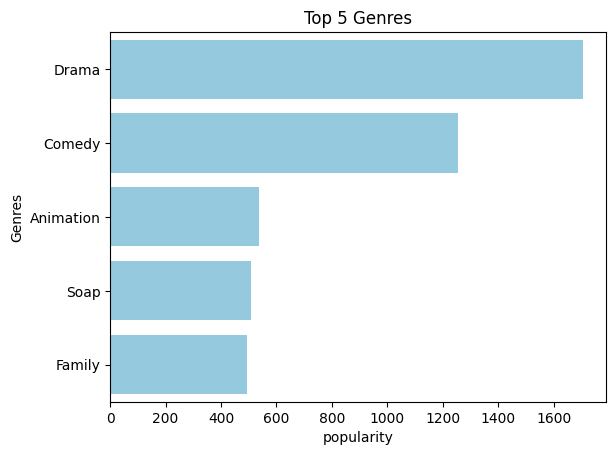

In [21]:
exploded_genres = shows_db.explode('genre', ignore_index=True)
genre_frequency = exploded_genres['genre'].value_counts()
top_genres = genre_frequency.head(5)
sns.barplot(x=top_genres.values, y=top_genres.index, orient ='h', color='skyblue')
plt.title('Top 5 Genres')
plt.xlabel('popularity')
plt.ylabel('Genres')
plt.show()

##### Top 5 Genres from Popular Shows

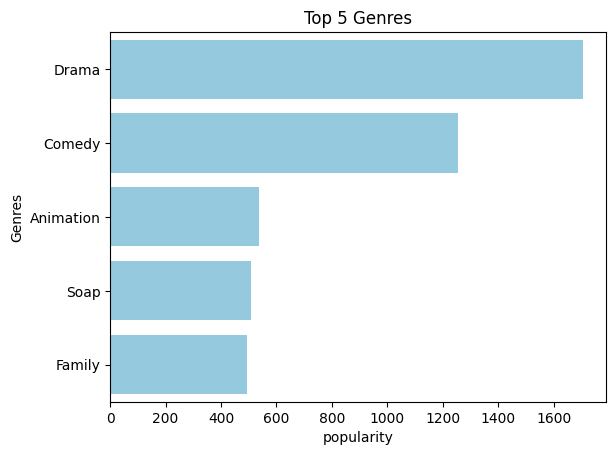

In [22]:
exploded_genres = most_popular.explode('genre', ignore_index=True)
genre_frequency = exploded_genres['genre'].value_counts()
top_genres = genre_frequency.head(5)
sns.barplot(x=top_genres.values, y=top_genres.index, orient ='h', color='skyblue')
plt.title('Top 5 Genres')
plt.xlabel('popularity')
plt.ylabel('Genres')
plt.show()

In [23]:
target_genres = {}
def contains_target_genres(genre_list):
    # Make sure the list of genres required are in the right format
    new_target_genres = set(genre.capitalize() for genre in target_genres)
    return new_target_genres.issubset(set(genre_list))

In [24]:
def contains_some_target_genres(genres):
    # Make sure the list of genres required are in the right format
    new_target_genres = set(genre.capitalize() for genre in target_genres)
    return any(item in genres for item in new_target_genres)

In [25]:
target_genres = set(top_genres.index)
is_target = pd.DataFrame(shows_db['genre'].apply(contains_some_target_genres))
top_shows = shows_db[is_target['genre'] == True].copy()  
top_shows['genre'] = top_shows['genre'].apply(lambda x: [genre.capitalize() \
                                                           for genre in x if genre.capitalize() in target_genres])
top_shows = top_shows.explode('genre')
grouped_year = pd.DataFrame(top_shows.groupby(['release_year', 'genre'], as_index=False)['title'].count())
grouped_year.rename({'title':'count'}, axis=1, inplace=True)
grouped_year.head(100)

,release_year,genre,count
0,0,Comedy,2
1,0,Drama,1
2,0,Family,1
3,0,Soap,1
4,1948,Comedy,1
...,...,...,...
95,1973,Family,4
96,1973,Soap,3
97,1974,Animation,1
98,1974,Comedy,4


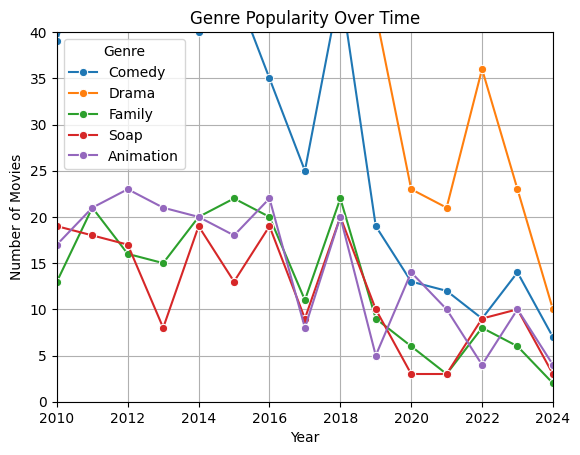

In [26]:
sns.lineplot(data=grouped_year, x="release_year", y="count", hue="genre", marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Genre Popularity Over Time")
plt.legend(title="Genre")
plt.xlim(2010, 2024)
plt.ylim(0,40)
plt.grid(True)
plt.show()

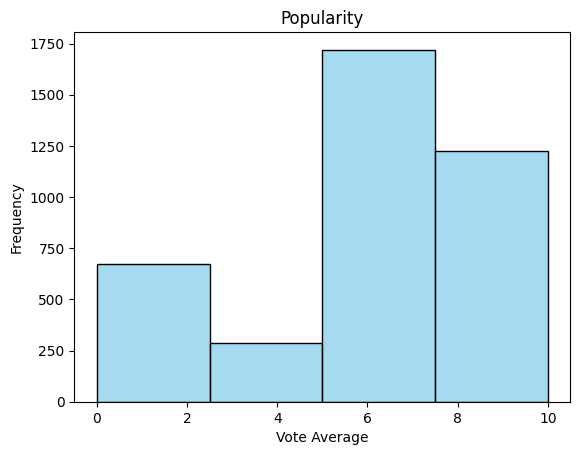

In [27]:
sns.histplot(data=shows_db, x='vote_average', bins=4, color='skyblue')
plt.title('Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

In [28]:
hidden_gems = shows_db[(shows_db['popularity'] < 100) & (shows_db['vote_average'] > 8.5)].copy()
hidden_gems = hidden_gems.explode('genre')
hidden_gems = hidden_gems.sort_values(by='vote_average', ascending=False)
group_hidden = hidden_gems.groupby(['genre'], as_index=False)['title'].count()

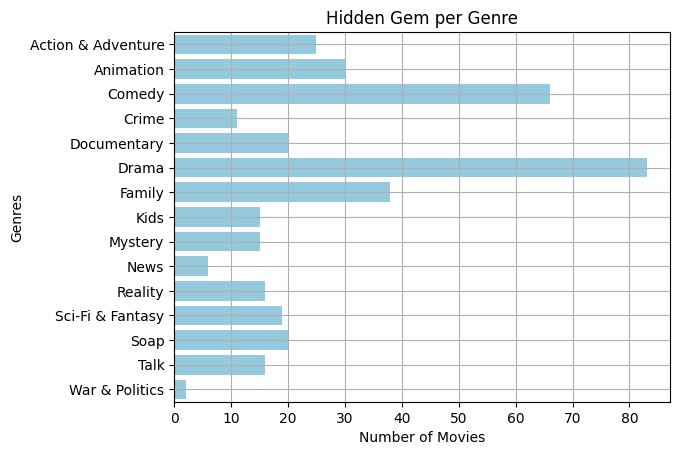

In [29]:
sns.barplot(data=group_hidden, x='title', y='genre', orient ='h', color='skyblue')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.title('Hidden Gem per Genre')
plt.grid(True)
plt.show()

## Show Recommendations

In [30]:
target_genres = {'Animation'}
is_target = pd.DataFrame(shows_db['genre'].apply(contains_target_genres))
target_shows = shows_db[is_target['genre'] == True].copy()
print('\033[1m' + 'Recommended shows based on Genre: ' + '\033[0m')
for n, title in enumerate(target_shows['title'], start=1):
    print(f'{n}. {title}')

Recommended shows based on Genre: 
1. 俺だけレベルアップな件
2. ドラえもん
3. 忍たま乱太郎
4. Points of View
5. 忍者ハットリくん
6. INVINCIBLE
7. The Grim Adventures of Billy and Mandy
8. Rooster Teeth Animated Adventures
9. The Simpsons
10. あたしンち
11. 斗罗大陆
12. こちら葛飾区亀有公園前派出所
13. Teen Titans Go!
14. カードファイト!! ヴァンガード
15. Red vs. Blue
16. Rick and Morty
17. The Bugs Bunny and Tweety Show
18. Caillou
19. The Loud House
20. かみさまみならい ヒミツのここたま
21. Craig of the Creek
22. ロックマン エグゼ
23. The Amazing World of Gumball
24. イナズマイレブン
25. ハンター×ハンター
26. アクエリオン
27. 幽☆遊☆白書
28. 夏目友人帳
29. ちはやふる
30. 地獄少女
31. 吞噬星空
32. とっとこハム太郎
33. 戦姫絶唱シンフォギア
34. キャンディ・キャンディ
35. PAW Patrol
36. Family Guy
37. The Yogi Bear Show
38. The Story of Tracy Beaker
39. スーパードラゴンボールヒーローズ
40. Cow and Chicken
41. Alvin and the Chipmunks
42. ちびまる子ちゃん
43. PB&J Otter
44. おそ松さん
45. Back at the Barnyard
46. Regular Show
47. UniteUp!
48. ３月のライオン
49. Rocket Power
50. Teen Titans
51. L'Agent Jean
52. Franklin
53. Käpt'n Blaubärs Seemannsgarn
54. Ninjago: Masters of Spinjitzu
5

In [31]:
new_db = shows_db.copy()
new_db.reset_index()
new_db['genre'] = new_db['genre'].apply( ', '.join)
new_db.head()

,genre_ids,id,origin_country,original_language,title,overview,popularity,release_date,vote_average,vote_count,release_month,release_year,genre
0,[10767],2261,[US],en,The Tonight Show Starring Johnny Carson,The Tonight Show Starring Johnny Carson is a t...,669.0369,1962-10-01,7.410,72,October,1962,Talk
1,"[10767, 35]",22980,[US],en,Watch What Happens Live with Andy Cohen,Bravo network executive Andy Cohen discusses p...,665.9644,2009-07-16,5.000,62,July,2009,"Talk, Comedy"
2,"[35, 10767]",59941,[US],en,The Tonight Show Starring Jimmy Fallon,After Jay Leno's second retirement from the pr...,660.6486,2014-02-17,5.865,327,February,2014,"Comedy, Talk"
3,"[35, 10767]",63770,[US],en,The Late Show with Stephen Colbert,Stephen Colbert brings his signature satire an...,507.1381,2015-09-08,6.459,296,September,2015,"Comedy, Talk"
4,[35],65701,[US],en,Good Mythical Morning,"Two ""Internetainers"" (Rhett & Link) go far out...",500.6862,2012-01-09,6.900,74,January,2012,Comedy


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(new_db['overview'].fillna(""))
genre_features = pd.DataFrame(tfidf_matrix.toarray(), index=new_db.index)

# Compute similarity between shows
cosine_sim = cosine_similarity(genre_features)

def get_recommendation(title, db, n=5, cosine_sim=cosine_sim):
    if title not in db["title"].values:
        return "show not found in database."
    
    # Get the index of the selected show
    show_index = db[db['title'] == title].index[0]
    
    # Get similarity scores & sort
    sim_scores = list(enumerate(cosine_sim[show_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top N similar shows that are hidden gems
    similar_shows = [db.iloc[i]['title'] for i, score in sim_scores if i != show_index]
    
    return similar_shows[:n]

title = shows_db.loc[0, 'title']
recs = get_recommendation(title, db=new_db)
if (isinstance(recs, type([]))):
    print('\033[1m' + f'Recommended shows Similar to {title}: ' + '\033[0m')
    for n, title in enumerate(recs, start=1):
        print(f'{n}. {title}')
else:
    print(recs)

Recommended shows Similar to The Tonight Show Starring Johnny Carson: 
1. Tonight Starring Jack Paar
2. Last Call with Carson Daly
3. Johnny Test
4. The Midnight Special
5. Late Show with David Letterman


In [33]:
updated_db = shows_db.copy()
updated_db.drop(['popularity', 'vote_average'], axis=1, inplace=True)

In [34]:
#Encode genre column to see if results are different
from sklearn.preprocessing import MultiLabelBinarizer
mlb_encoder = MultiLabelBinarizer(sparse_output=False)

genre_matrix = mlb_encoder.fit_transform(shows_db['genre'])
encoded_db = pd.concat([updated_db.copy(), pd.DataFrame(genre_matrix).copy()], axis=1)
#encoded_db.drop(columns=['genre'], inplace=True)
encoded_db.dropna(subset=['title', 'id'], how='all', inplace=True)

In [35]:
title = shows_db.loc[0, 'title']
cosine_sim = cosine_similarity(genre_matrix)
recs = get_recommendation(title, db=encoded_db)
if (isinstance(recs, type([]))):
    print('\033[1m' + f'Recommended Movies Similar to {title}: ' + '\033[0m')
    for n, title in enumerate(recs, start=1):
        print(f'{n}. {title}')
else:
    print(recs)

Recommended Movies Similar to The Tonight Show Starring Johnny Carson: 
1. Tonight Starring Jack Paar
2. Last Call with Carson Daly
3. Johnny Test
4. The Midnight Special
5. Late Show with David Letterman


## Predict Genres using overview

In [36]:
# Content-Based Filtering
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(encoded_db['overview'])

In [37]:
from sklearn.model_selection import train_test_split
genre_matrix = genre_matrix[~np.isnan(genre_matrix).any(axis=1)]
new_matrix = tfidf_matrix[~np.isnan(genre_matrix).any(axis=1)]
X_train, X_test, y_train, y_test = train_test_split(new_matrix, genre_matrix, test_size=0.2, random_state=1)

In [38]:
index= 20
prob_threshold = 0.25

In [39]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
classifier = MultiOutputClassifier(OneVsRestClassifier(LogisticRegression(solver="lbfgs", max_iter=1000)))
classifier.fit(X_train, y_train)

def predict_genres(show_overview):
    if pd.isna(show_overview) or not isinstance(show_overview, type('')) or show_overview.strip() == '':
        return ['No overview availalble']  # Handle empty or null cases
    
    overview_tfidf = vectorizer.transform([show_overview])
    predicted = classifier.predict(overview_tfidf)    
    
    if predicted.sum() == 0:
        predicted[0, np.argmax(y_train.sum(axis=0))] = 1 #assign the most common genre if model finds no patterns
    return mlb_encoder.inverse_transform(predicted)[0]
print(f'{predict_genres(encoded_db.loc[index, "overview"])} / {encoded_db.loc[index, "genre"]}')

('Drama',) / ['Drama', 'Action & Adventure']


##### The Probability for each genre after going through the model is quite low due to Drama being the most frequent genre so the argument class weight is set to balanced to replicate the infrequent class until there's as many samples as the more frequent one. In addition, the probability threshold is increased to increase accuracy.

In [40]:
classifier = MultiOutputClassifier(OneVsRestClassifier(LogisticRegression(solver="lbfgs", class_weight='balanced', max_iter=1000)))
prob_threshold = 0.5
classifier.fit(X_train, y_train)
print(f'{predict_genres(encoded_db.loc[index, "overview"])} / {encoded_db.loc[index, "genre"]}')

('Action & Adventure', 'Drama') / ['Drama', 'Action & Adventure']


In [41]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=mlb_encoder.classes_, zero_division=0))

                    precision    recall  f1-score   support

Action & Adventure       0.61      0.55      0.58        92
         Animation       0.61      0.65      0.63       102
            Comedy       0.63      0.56      0.59       243
             Crime       0.66      0.51      0.57        65
       Documentary       0.59      0.42      0.49        40
             Drama       0.78      0.67      0.72       363
            Family       0.33      0.27      0.30        99
              Kids       0.60      0.44      0.51        59
           Mystery       0.48      0.26      0.34        46
              News       0.29      0.43      0.34        14
           Reality       0.68      0.47      0.56        76
  Sci-Fi & Fantasy       0.66      0.62      0.64        85
              Soap       0.47      0.45      0.46       103
              Talk       0.57      0.58      0.57        64
    War & Politics       1.00      0.12      0.22         8
           Western       1.00      0.25

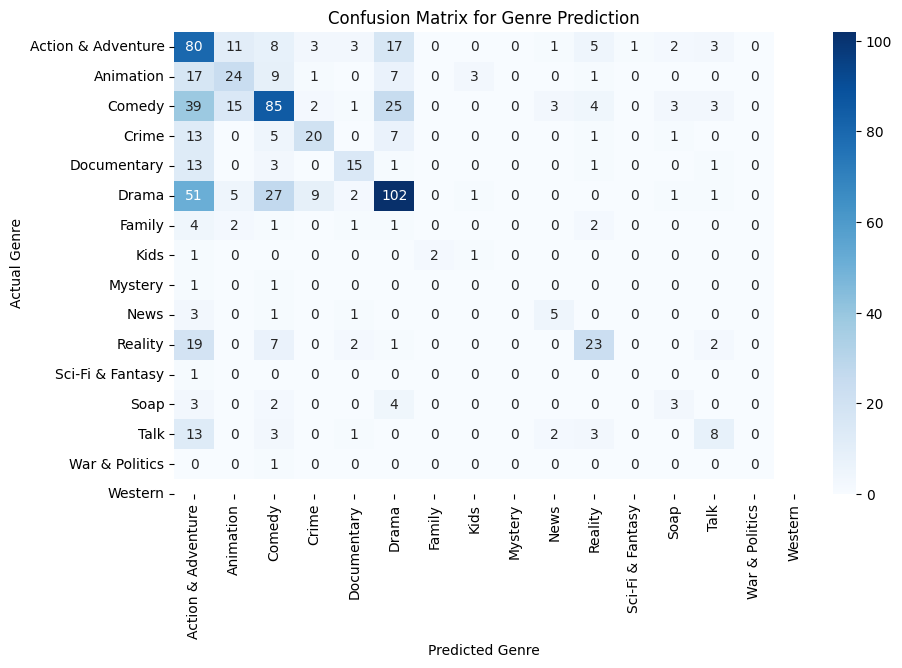

In [42]:
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=mlb_encoder.classes_, yticklabels=mlb_encoder.classes_)
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.title("Confusion Matrix for Genre Prediction")
plt.show()

Text(0.5, 1.0, 'Misclassification Heatmap for Genre Prediction')

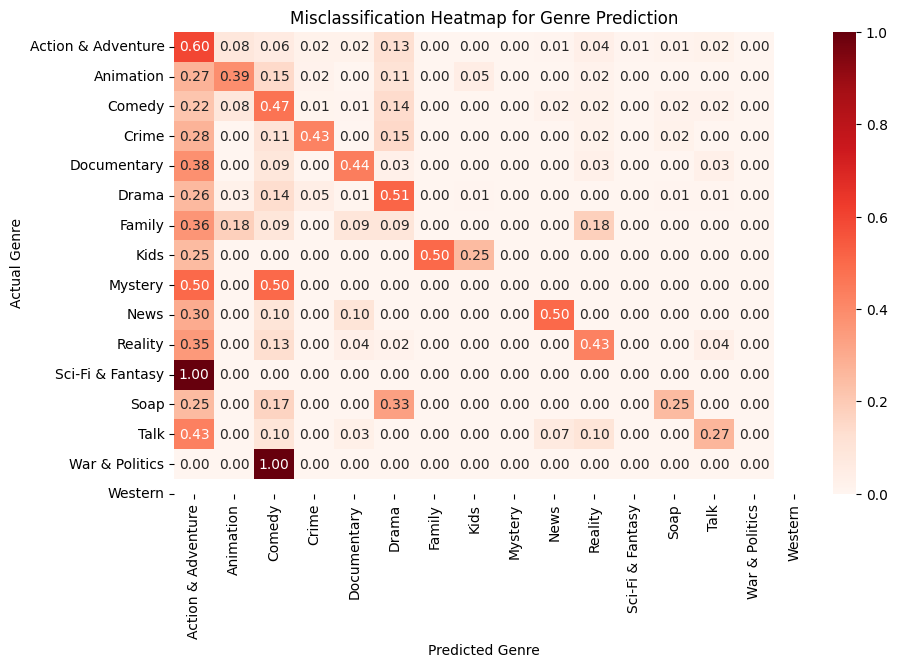

In [43]:
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Reds", xticklabels=mlb_encoder.classes_, yticklabels=mlb_encoder.classes_)
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.title("Misclassification Heatmap for Genre Prediction")

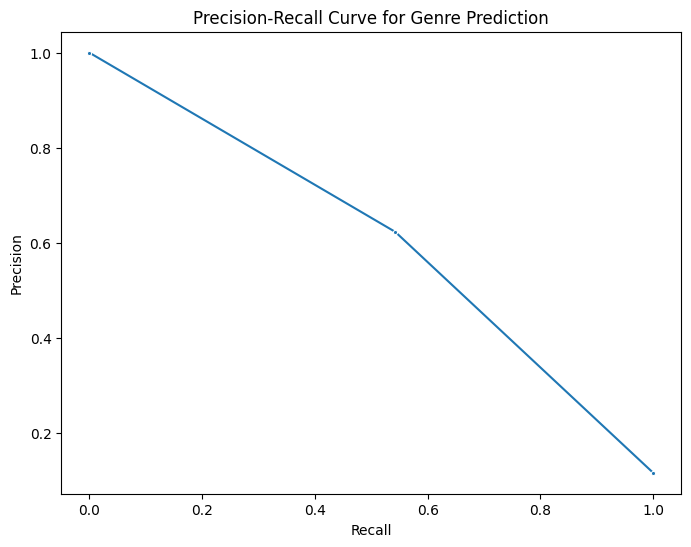

In [44]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test.ravel(), y_pred.ravel())
from sklearn.metrics import precision_recall_curve
# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=recall, y=precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Genre Prediction")
plt.show()